In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import os
import sprinter
import getpass

In [3]:
qfib_dir = '/home/'+getpass.getuser()+'/Dropbox/TRAKODATA/qfib-data/'
qfib_ext = '.tck'
dpy_dir = '/home/'+getpass.getuser()+'/Dropbox/TRAKODATA/qfib-data/'
dpy_ext = '.tck'
tko_dir = '/home/'+getpass.getuser()+'/Dropbox/TRAKODATA/qfib-data/'
tko_ext = '.vtk'

files = '''/home/d/Downloads/tracto60kiFOD10.1.tck,/home/d/Downloads/tracto60kSD_STREAM0.1.tck,
/home/d/Downloads/tracto60kiFOD10.2.tck,/home/d/Downloads/tracto60kSD_STREAM0.2.tck,
/home/d/Downloads/tracto60kiFOD10.5.tck,/home/d/Downloads/tracto60kSD_STREAM0.5.tck,
/home/d/Downloads/tracto60kiFOD11.tck,/home/d/Downloads/tracto60kSD_STREAM1.tck'''
files = files.replace('/home/d/Downloads/','').replace('.tck','').replace('\n','').split(',')
        
# files = files[0:2]

input_size = 0
for f in files:
    print(os.path.join(tko_dir, f+tko_ext), os.path.getsize(os.path.join(tko_dir, f+tko_ext)))
    input_size += os.path.getsize(os.path.join(tko_dir, f+tko_ext))
input_size /= float(len(files))

qfib_files = [(qfib_dir, f+qfib_ext) for f in files]
qfib_bits = [8, 16]
tko_files = [(tko_dir, f+tko_ext) for f in files]
tko_bits = [9,10,11,12,13]
dpy_files =  [(dpy_dir, f+dpy_ext) for f in files]


/home/haehn/Dropbox/TRAKODATA/qfib-data/tracto60kiFOD10.1.vtk 1606606379
/home/haehn/Dropbox/TRAKODATA/qfib-data/tracto60kSD_STREAM0.1.vtk 1401503250
/home/haehn/Dropbox/TRAKODATA/qfib-data/tracto60kiFOD10.2.vtk 860079314
/home/haehn/Dropbox/TRAKODATA/qfib-data/tracto60kSD_STREAM0.2.vtk 703801854
/home/haehn/Dropbox/TRAKODATA/qfib-data/tracto60kiFOD10.5.vtk 455814632
/home/haehn/Dropbox/TRAKODATA/qfib-data/tracto60kSD_STREAM0.5.vtk 300742573
/home/haehn/Dropbox/TRAKODATA/qfib-data/tracto60kiFOD11.vtk 370519066
/home/haehn/Dropbox/TRAKODATA/qfib-data/tracto60kSD_STREAM1.vtk 174631017


In [4]:
files

['tracto60kiFOD10.1',
 'tracto60kSD_STREAM0.1',
 'tracto60kiFOD10.2',
 'tracto60kSD_STREAM0.2',
 'tracto60kiFOD10.5',
 'tracto60kSD_STREAM0.5',
 'tracto60kiFOD11',
 'tracto60kSD_STREAM1']

In [5]:
dpy_sizes, dpy_errors, dpy_stds, dpy_advstats = sprinter.Sprinter.run_dpy(qfib_files)

In [6]:
qfib_sizes, qfib_errors, qfib_stds, qfib_advstats = sprinter.Sprinter.run_qfib(qfib_files, qfib_bits)

In [7]:
runs = {}

In [8]:
config = {
    'POSITION': {
        'position':True,
        'sequential':True,
        'quantization_bits':None,
        'compression_level':10,
        'quantization_range':-1,
        'quantization_origin':None
    },
    'INDICES': {
        'position':False,
        'sequential':True,
        'quantization_bits':None,
        'compression_level':10,
        'quantization_range':-1,
        'quantization_origin':None
    },
    'name': 'qbi{bits}'
}
tko_sizes, tko_errors, tko_stds, tko_advstats = sprinter.Sprinter.run_trako(config, tko_files, tko_bits, binary=False)
runs[config['name']] = [tko_sizes, tko_errors, tko_stds, tko_advstats]

Failing..
Failing..


In [9]:
config = {
    'POSITION': {
        'position':True,
        'sequential':True,
        'quantization_bits':None,
        'compression_level':10,
        'quantization_range':-1,
        'quantization_origin':None
    },
    'INDICES': {
        'position':False,
        'sequential':True,
        'quantization_bits':None,
        'compression_level':10,
        'quantization_range':-1,
        'quantization_origin':None
    },
    'name': 'qbi{bits}_binary'
}
tko_sizes, tko_errors, tko_stds, tko_advstats = sprinter.Sprinter.run_trako(config, tko_files, tko_bits, binary=True)
runs[config['name']] = [tko_sizes, tko_errors, tko_stds, tko_advstats]

Failing..


/home/haehn/miniconda3/envs/TRAKODEV/lib/python3.6/site-packages/vtk-8.1.2-py3.6-linux-x86_64.egg/vtk/util/numpy_support.py:137: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  assert not numpy.issubdtype(z.dtype, complex), \
/home/haehn/miniconda3/envs/TRAKODEV/lib/python3.6/site-packages/vtk-8.1.2-py3.6-linux-x86_64.egg/vtk/util/numpy_support.py:137: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  assert not numpy.issubdtype(z.dtype, complex), \
/home/haehn/miniconda3/envs/TRAKODEV/lib/python3.6/site-packages/vtk-8.1.2-py3.6-linux-x86_64.egg/vtk/util/numpy_support.py:137: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In futur

Failing..


/home/haehn/miniconda3/envs/TRAKODEV/lib/python3.6/site-packages/vtk-8.1.2-py3.6-linux-x86_64.egg/vtk/util/numpy_support.py:137: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  assert not numpy.issubdtype(z.dtype, complex), \
/home/haehn/miniconda3/envs/TRAKODEV/lib/python3.6/site-packages/vtk-8.1.2-py3.6-linux-x86_64.egg/vtk/util/numpy_support.py:137: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  assert not numpy.issubdtype(z.dtype, complex), \
/home/haehn/miniconda3/envs/TRAKODEV/lib/python3.6/site-packages/vtk-8.1.2-py3.6-linux-x86_64.egg/vtk/util/numpy_support.py:137: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In futur

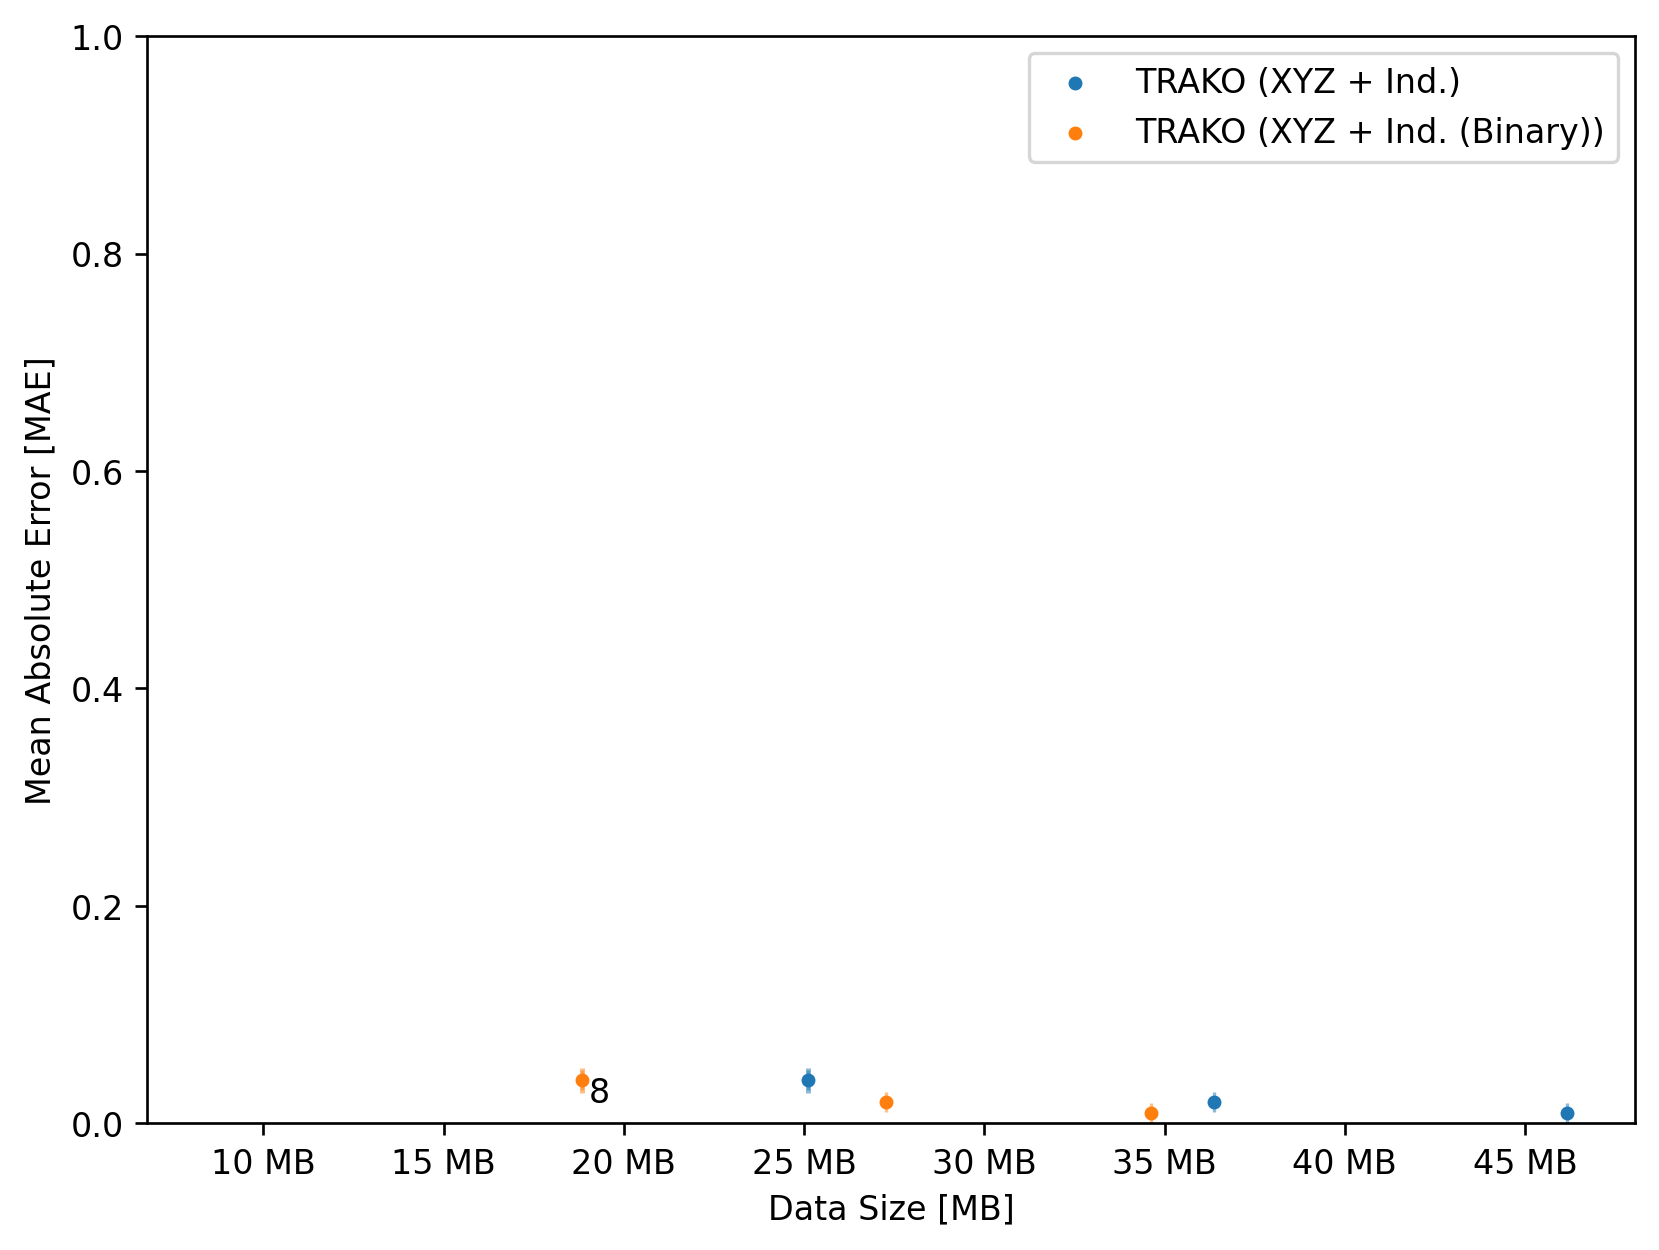

In [10]:
# sprinter.Sprinter.bitsplot(plt, tkoruns=runs, qfibruns=[qfib_sizes, qfib_errors, qfib_stds], ylim=(0,1), filename='/tmp/out.pdf')
sprinter.Sprinter.bitsplot(plt, tkoruns=runs, filename='/tmp/qfib_full.pdf')

In [11]:
print(input_size/1000000)

734.212260625


In [12]:
qfib_sizes, qfib_errors, qfib_stds, qfib_advstats = sprinter.Sprinter.run_qfib(qfib_files, qfib_bits)

In [13]:
sprinter.Sprinter.createtable('qfib-data', input_size, {'qfib': [qfib_sizes, qfib_errors, qfib_stds, qfib_advstats]}, selector=1)

~~~qfib & 44.24M & 93.975$\times$ & 16.597\% & 0.0 & 0.019 & 0.002$\pm$0.001 & 0.0 & 0.017 & 0.001$\pm$0.001 & 476.738 & 66.711\\


In [14]:
sprinter.Sprinter.createtable('qfib-data', input_size, {'dpy': [dpy_sizes, dpy_errors, dpy_stds, dpy_advstats]}, selector=0)

~~~dpy & 118.65M & 83.839$\times$ & 6.188\% & 0 & 0 & 0.0$\pm$0.0 & 0.0 & 0 & 0.0$\pm$0.0 & 95.14 & 2997.115\\


In [15]:
sprinter.Sprinter.createtable('qfib-data', input_size, runs, selector=1)

~~~TRAKO & 19.46M & 97.349$\times$ & 37.726\% & 0.0 & 160.472 & 6.625$\pm$4.782 & 0.001 & 160.472 & 15.141$\pm$9.712 & 272.538 & 164.41\\
~~~TRAKO (Binary) & 14.6M & 98.012$\times$ & 50.302\% & 0.0 & 160.472 & 6.625$\pm$4.782 & 0.001 & 160.472 & 15.141$\pm$9.712 & 284.413 & 172.36\\


In [30]:
DATASETNAME = 'qfib-data'

import collections
all_runs = collections.OrderedDict()
all_runs['qfib (8bit)'] = [0, qfib_sizes, qfib_errors, qfib_stds, qfib_advstats]
all_runs['qfib (16bit)'] = [1, qfib_sizes, qfib_errors, qfib_stds, qfib_advstats]
all_runs['zfib'] = [0, dpy_sizes, dpy_errors, dpy_stds, dpy_advstats]

for r in runs.keys():
    all_runs[r] = [4] + runs[r]
    
sprinter.Sprinter.createfulltable(DATASETNAME, input_size, all_runs)

\textbf{qfib-data} & 734.21M\\
~~~qfib (8bit)~\cite{mercier2020qfib} & 22.9M & 96.881\% & 32.064$\times$ & 0.0 & 0.758 & 0.058$\pm$0.023 & 0.0 & 0.74 & 0.038$\pm$0.038 & 476.644 & 65.973\\
~~~qfib (16bit)~\cite{mercier2020qfib} & 44.24M & 93.975\% & 16.597$\times$ & 0.0 & 0.019 & 0.002$\pm$0.001 & 0.0 & 0.017 & 0.001$\pm$0.001 & 476.738 & 66.711\\
~~~zfib/Dipy~\cite{presseau2015new} & 118.65M & 83.839\% & 6.188$\times$ & 0 & 0 & 0.0$\pm$0.0 & 0.0 & 0 & 0.0$\pm$0.0 & 95.14 & 2997.115\\
~~~TRAKO & 46.18M & 93.71\% & 15.899$\times$ & 0.0 & 0.018 & 0.01$\pm$0.003 & 0.0 & 0.018 & 0.01$\pm$0.002 & 273.328 & 190.095\\
~~~TRAKO (Binary) & 34.63M & 95.283\% & 21.199$\times$ & 0.0 & 0.018 & 0.01$\pm$0.003 & 0.0 & 0.018 & 0.01$\pm$0.002 & 272.421 & 188.598\\
